In [ ]:
#Replace the NaN values with correct value. And justify why you have chosen the same.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Placement_Data_Full_Class.csv")

# 1. Replace missing values in 'sl_no' with sequential integers based on the index.
data['sl_no'] = data['sl_no'].fillna(pd.Series(range(1, len(data) + 1)))

# 2. Replace missing 'salary' values with 0 (assuming these candidates were not placed).
data['salary'].fillna(0, inplace=True)

# Display information about the updated dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           217 non-null    float64
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          217 non-null    float64
dtypes: float64(7), object(8)
memory usage: 25.6+ KB
None
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0

C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\3467200245.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].fillna(0, inplace=True)


In [ ]:
#How many of them are not placed?

In [2]:
# Count the number of candidates who are not placed
not_placed_count = data[data['status'] == 'Not Placed'].shape[0]

# Display the result
print("Number of students not placed:", not_placed_count)


Number of students not placed: 67


In [ ]:
# Find the reason for non placement from the dataset?

In [3]:
# Group data by 'status' (Placed vs. Not Placed) and calculate mean for relevant columns
analysis = data.groupby('status')[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']].mean()

# Compare work experience and specialization distribution for placed vs. not placed candidates
workex_distribution = data.groupby(['status', 'workex']).size().unstack()
specialisation_distribution = data.groupby(['status', 'specialisation']).size().unstack()

# Display the analysis
print("Mean Scores Comparison:")
print(analysis)

print("\nWork Experience Distribution:")
print(workex_distribution)

print("\nSpecialisation Distribution:")
print(specialisation_distribution)


Mean Scores Comparison:
                ssc_p      hsc_p   degree_p      mba_p    etest_p
status                                                           
Not Placed  57.544030  58.395522  61.134179  61.612836  69.587910
Placed      71.721486  69.926554  68.740541  62.579392  73.238041

Work Experience Distribution:
workex      No  Yes
status             
Not Placed  57   10
Placed      84   64

Specialisation Distribution:
specialisation  Mkt&Fin  Mkt&HR
status                         
Not Placed           25      42
Placed               95      53


In [ ]:
# What kind of relation between salary and mba_p

Correlation between salary and mba_p: 0.14


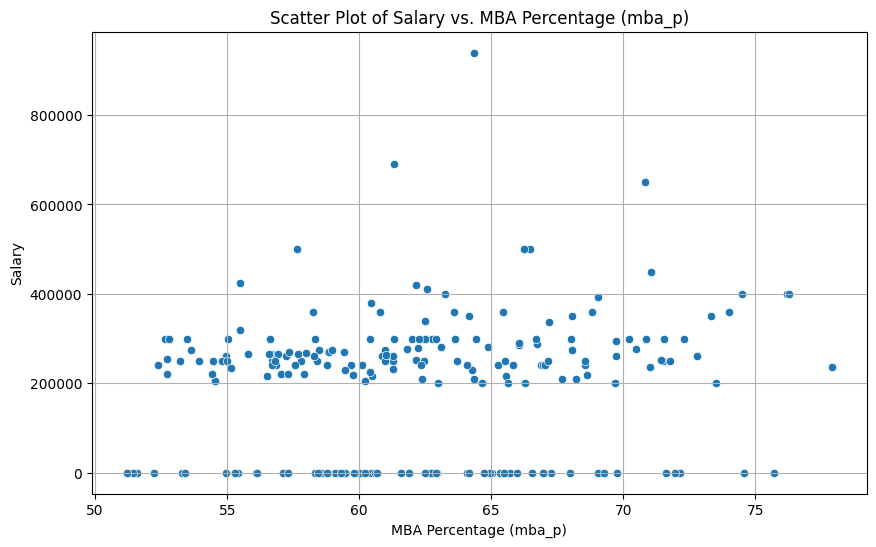

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between 'salary' and 'mba_p'
correlation = data[['salary', 'mba_p']].corr().iloc[0, 1]
print(f"Correlation between salary and mba_p: {correlation:.2f}")

# Scatter plot of 'salary' vs. 'mba_p'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='mba_p', y='salary')
plt.title("Scatter Plot of Salary vs. MBA Percentage (mba_p)")
plt.xlabel("MBA Percentage (mba_p)")
plt.ylabel("Salary")
plt.grid()
plt.show()


In [ ]:
# Which specialization is getting minimum salary?

In [5]:

# Find the specialization with the minimum average salary
min_salary_specialisation = data.groupby('specialisation')['salary'].mean().idxmin()
min_salary_value = data.groupby('specialisation')['salary'].mean().min()

print(f"Specialization with minimum average salary: {min_salary_specialisation}")
print(f"Minimum average salary: {min_salary_value}")

Specialization with minimum average salary: Mkt&HR
Minimum average salary: 150842.1052631579


In [ ]:
#How many of them getting above 500000 salary?

In [6]:
# Count the number of candidates with a salary above 500,000
high_salary_count = data[data['salary'] > 500000].shape[0]

print(f"Number of candidates with salary above 500,000: {high_salary_count}")


Number of candidates with salary above 500,000: 3


In [ ]:
#Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [7]:
from scipy.stats import f_oneway
# Drop rows with missing values in 'etest_p' and 'mba_p' columns
data = data[['etest_p', 'mba_p']].dropna()

# Perform ANOVA test
f_stat, p_value = f_oneway(data['etest_p'], data['mba_p'])

# Set significance level
alpha = 0.05

# Decision
if p_value < alpha:
    decision = "Reject the null hypothesis (H0). There is a significant difference between etest_p and mba_p."
else:
    decision = "Fail to reject the null hypothesis (H0). There is no significant difference between etest_p and mba_p."

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")

F-statistic: 98.64
P-value: 0.0000
Decision: Reject the null hypothesis (H0). There is a significant difference between etest_p and mba_p.


In [ ]:
#Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
file_path = 'Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

# Filter salaries for 'Sci&Tech' in degree_t and 'Mkt&HR' in specialisation
sci_tech_salary = data[data['degree_t'] == 'Sci&Tech']['salary'].dropna()
mkt_hr_salary = data[data['specialisation'] == 'Mkt&HR']['salary'].dropna()

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(sci_tech_salary, mkt_hr_salary, equal_var=False)

# Set significance level
alpha = 0.05

# Decision
if p_value < alpha:
    decision = "Reject the null hypothesis (H0). There is a significant difference in salary."
else:
    decision = "Fail to reject the null hypothesis (H0). There is no significant difference in salary."

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")


T-statistic: 2.55
P-value: 0.0134
Decision: Reject the null hypothesis (H0). There is a significant difference in salary.


In [ ]:
#Convert the normal distribution to standard normal distribution for salary column

In [11]:

# Load the dataset
file_path = 'Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

# Drop NaN values from 'salary' and calculate mean and standard deviation
mean_salary = data['salary'].mean()
std_salary = data['salary'].std()

# Convert 'salary' to standardized values (Z-scores)
data['salary_standardized'] = (data['salary'] - mean_salary) / std_salary

# Display the first few rows to verify the transformation
print(data[['salary', 'salary_standardized']].head())


     salary  salary_standardized
0  270000.0            -0.199614
1  200000.0            -0.948618
2  250000.0            -0.413615
3       NaN                  NaN
4  425000.0             1.458895


In [ ]:
#What is the probability Density Function of the salary range from 700000 to 900000?

In [12]:
from scipy.stats import norm

# Load the dataset
file_path = 'Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

# Drop NaN values and calculate mean and standard deviation for the 'salary' column
salary_data = data['salary'].dropna()
mean_salary = salary_data.mean()
std_salary = salary_data.std()

# Define the range for which we want the PDF
lower_bound = 700000
upper_bound = 900000

# Calculate the PDF at the specified salary points
pdf_lower = norm.pdf(lower_bound, loc=mean_salary, scale=std_salary)
pdf_upper = norm.pdf(upper_bound, loc=mean_salary, scale=std_salary)

# Display the results
print(f"Probability Density at salary {lower_bound}: {pdf_lower:.6f}")
print(f"Probability Density at salary {upper_bound}: {pdf_upper:.6f}")


Probability Density at salary 700000: 0.000000
Probability Density at salary 900000: 0.000000


In [ ]:
#Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [14]:
from scipy.stats import ttest_rel
# Load the dataset
file_path = 'Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

# Filter data for students with degree_t = 'Sci&Tech'
sci_tech_data = data[data['degree_t'] == 'Sci&Tech']

# Drop NaN values for etest_p and mba_p
etest_p = sci_tech_data['etest_p'].dropna()
mba_p = sci_tech_data['mba_p'].dropna()

# Ensure both arrays have the same length for paired t-test
etest_p, mba_p = etest_p.align(mba_p, join='inner')

# Perform a paired t-test
t_stat, p_value = ttest_rel(etest_p, mba_p)

# Set significance level
alpha = 0.05

# Decision
if p_value < alpha:
    decision = "Reject the null hypothesis (H0). There is a significant difference between etest_p and mba_p."
else:
    decision = "Fail to reject the null hypothesis (H0). There is no significant difference between etest_p and mba_p."

# Output results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")


T-statistic: 5.00
P-value: 0.0000
Decision: Reject the null hypothesis (H0). There is a significant difference between etest_p and mba_p.


In [ ]:
#Which parameter is highly correlated with salary?

In [15]:

# Load the dataset
file_path = 'Placement_Data_Full_Class.csv'
data = pd.read_csv(file_path)

# Drop NaN values for salary and other columns to ensure valid computations
numerical_data = data.dropna(subset=['salary'])  # Drop rows with missing salary
numerical_data = numerical_data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns

# Calculate correlation of all numerical columns with salary
correlation_with_salary = numerical_data.corr()['salary'].sort_values(ascending=False)

# Find the parameter with the highest correlation
most_correlated_parameter = correlation_with_salary.index[1]  # Skip 'salary' itself
highest_correlation_value = correlation_with_salary.iloc[1]  # Correlation value of the most correlated parameter

# Output results
print("Correlation of all parameters with salary:")
print(correlation_with_salary)
print(f"\nParameter most correlated with salary: {most_correlated_parameter} ({highest_correlation_value:.4f})")


Correlation of all parameters with salary:
salary      1.000000
etest_p     0.178307
mba_p       0.175013
hsc_p       0.076819
sl_no       0.063764
ssc_p       0.035330
degree_p   -0.019272
Name: salary, dtype: float64

Parameter most correlated with salary: etest_p (0.1783)


In [ ]:
#plot any useful graph and explain it

C:\Users\Admin\AppData\Local\Temp\ipykernel_17376\945174755.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='specialisation', y='salary', data=plot_data, palette='viridis')


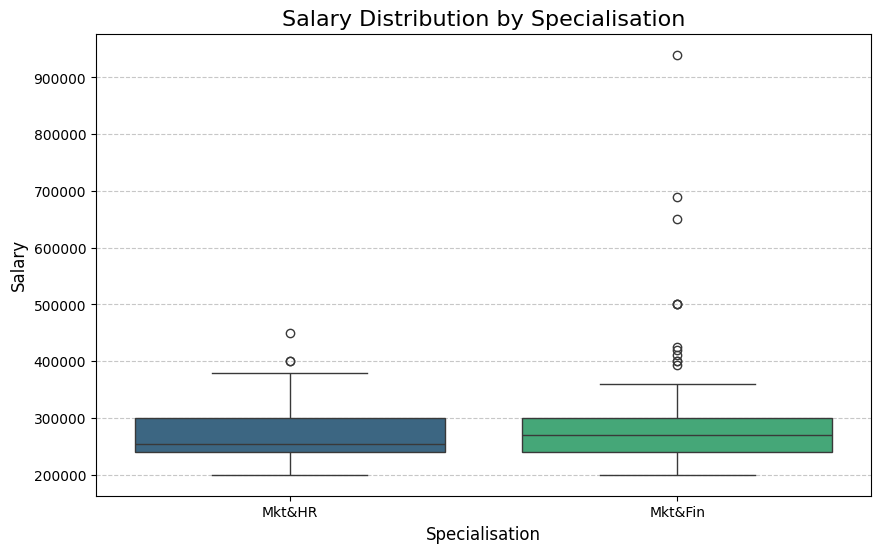

In [16]:
# Import necessary libraries
import seaborn as sns

# Drop NaN values for relevant columns
plot_data = data.dropna(subset=['salary', 'specialisation'])

# Plot a boxplot of salaries grouped by specialisation
plt.figure(figsize=(10, 6))
sns.boxplot(x='specialisation', y='salary', data=plot_data, palette='viridis')

# Add labels and title
plt.title('Salary Distribution by Specialisation', fontsize=16)
plt.xlabel('Specialisation', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

